In [36]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import pydicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology

In [37]:
def load_slices(path):
    slices = [pydicom.dcmread(path + '\\' + s) for s in os.listdir(path) if s.endswith('dcm')]
    slices = [s for s in slices if 'SliceLocation' in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] -slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices

path = "D:\\GoogleDrive\\dataset\\radiology\\TCIA_LIDC-IDRI\\LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-30178\\3000566.000000-03192"


In [56]:
def get_slices_hounsfield(slices):
    print('fds')
    images = np.stack([s.pixel_array for s in slices])
    images = images.astype(np.int16)
    print('fds')
    images[images == -2000] = 0
    
    intercept = slices[0].RescaleIntercept
    slope = slices[0].RescaleSlope
    
    print('fds')

    if slope != 1:
        images = slope * images.astype(np.float64)
        images = images.astype(np.int16)

    images += np.int16(intercept)

    return np.array(images, dtype=np.int16)

In [57]:
slices = load_slices(path)
images = get_slices_hounsfield(slices)

fds
fds
fds


In [32]:
image[image == -2000]

array([], dtype=int16)

In [34]:
slices[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.512235483218154065970649917292
(0008, 0020) Study Date                          DA: '20000101'
(0008, 0021) Series Date                         DA: '20000101'
(0008, 0022) Acquisition Date                    DA: '20000101'
(0008, 0023) Content Date                        DA: '20000101'
(0008, 0024) Overlay Date                        DA: '20000101'
(0008, 0025) Curve Date                          DA: '20000101'
(0008, 002a) Acquisition DateTime                DT: '20000101'
(0008, 0030) Study Time                          TM: ''
(0008, 0032) Acquisition Time                    TM: ''
(0008, 0033) Content Time                        TM: ''
(0008, 0050) Accession Number               

In [1]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')

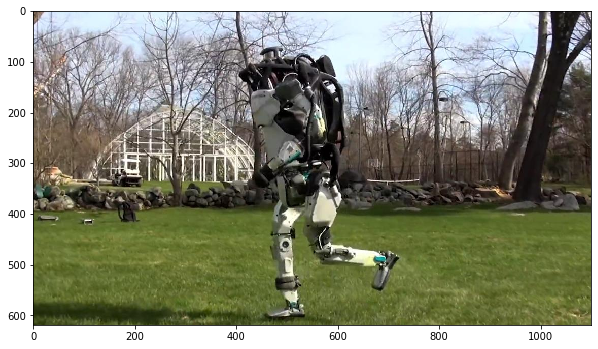

In [2]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [3]:

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

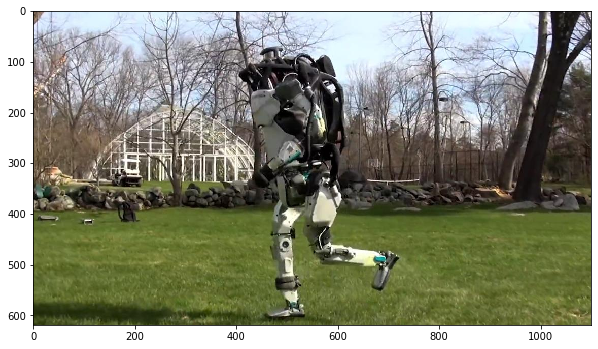

In [14]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
aug = HorizontalFlip(p=0.5)
augment_and_show(aug, image)

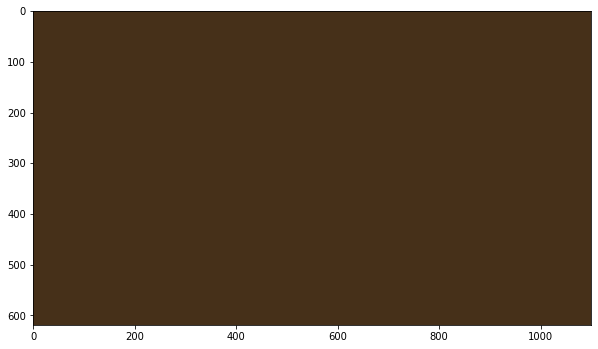

In [22]:
aug = IAAPerspective(scale=0.01, p=1)
augment_and_show(aug, image)

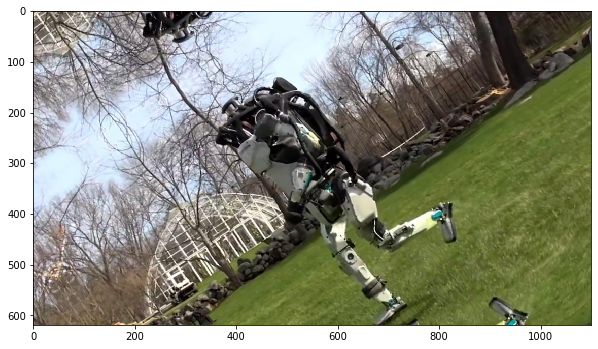

In [23]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)